In [53]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
p_vals = []
for i in range(1000):
    try:
        n_var = np.random.randint(2, 100)
        mean = np.random.rand(n_var)
        cov = np.random.randn(n_var, n_var)
        cov = np.dot(cov, cov.T)
        cum_mean = np.sum(mean)
        cum_var = np.sum(cov)
        true_dist = stats.multivariate_normal(mean=mean, cov=cov)
        true_samples = np.sum(true_dist.rvs(size=100), axis=1)
        #result = stats.normaltest(true_samples)
        cand_dist = stats.norm(loc=cum_mean, scale=np.sqrt(cum_var))
        result = stats.kstest(true_samples, cand_dist.cdf)
        p_vals.append(result.pvalue)
    except:
        continue

KstestResult(statistic=0.054135324494364201, pvalue=0.0054794111311320393)


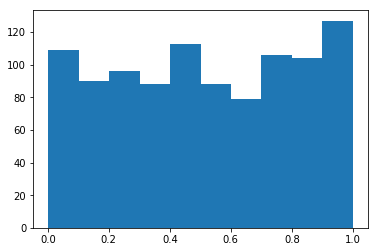

In [91]:
print(stats.kstest(p_vals, 'uniform'))
plt.hist(p_vals)
plt.show()